# Credit Card Fraud Detection

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
train_data = pd.read_csv("/content/fraudTrain.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11706 entries, 0 to 11705
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             11706 non-null  int64  
 1   trans_date_trans_time  11706 non-null  object 
 2   cc_num                 11706 non-null  int64  
 3   merchant               11706 non-null  object 
 4   category               11706 non-null  object 
 5   amt                    11706 non-null  float64
 6   first                  11706 non-null  object 
 7   last                   11706 non-null  object 
 8   gender                 11706 non-null  object 
 9   street                 11706 non-null  object 
 10  city                   11706 non-null  object 
 11  state                  11706 non-null  object 
 12  zip                    11706 non-null  int64  
 13  lat                    11706 non-null  float64
 14  long                   11706 non-null  float64
 15  ci

In [4]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,11706.00000,1.170600e+04,11706.000000,11706.000000,11706.000000,11706.000000,1.170600e+04,1.170500e+04,11705.000000,11705.000000,11705.000000
mean,5852.50000,4.258380e+17,68.760918,49212.270203,38.562065,-90.540940,8.952011e+04,1.325688e+09,38.560738,-90.535437,0.004101
std,3379.37546,1.320777e+18,113.379429,27100.223974,5.173634,14.353408,3.001465e+05,1.873839e+05,5.199968,14.375129,0.063909
min,0.00000,6.041621e+10,1.010000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.165823,-166.550779,0.000000
25%,2926.25000,1.800462e+14,9.750000,26041.000000,34.743700,-97.060900,7.430000e+02,1.325511e+09,34.831130,-97.161258,0.000000
50%,5852.50000,3.521417e+15,48.495000,48438.000000,39.371600,-87.644300,2.408000e+03,1.325704e+09,39.360761,-87.632339,0.000000
75%,8778.75000,4.642255e+15,83.122500,72165.000000,41.846700,-80.158000,1.940800e+04,1.325863e+09,41.896736,-80.226861,0.000000
max,11705.00000,4.992346e+18,3178.510000,99783.000000,65.689900,-67.950300,2.906700e+06,1.325969e+09,66.645176,-66.967742,1.000000


In [5]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,11706.00000,1.170600e+04,11706.000000,11706.000000,11706.000000,11706.000000,1.170600e+04,1.170500e+04,11705.000000,11705.000000,11705.000000
mean,5852.50000,4.258380e+17,68.760918,49212.270203,38.562065,-90.540940,8.952011e+04,1.325688e+09,38.560738,-90.535437,0.004101
std,3379.37546,1.320777e+18,113.379429,27100.223974,5.173634,14.353408,3.001465e+05,1.873839e+05,5.199968,14.375129,0.063909
min,0.00000,6.041621e+10,1.010000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.165823,-166.550779,0.000000
25%,2926.25000,1.800462e+14,9.750000,26041.000000,34.743700,-97.060900,7.430000e+02,1.325511e+09,34.831130,-97.161258,0.000000
50%,5852.50000,3.521417e+15,48.495000,48438.000000,39.371600,-87.644300,2.408000e+03,1.325704e+09,39.360761,-87.632339,0.000000
75%,8778.75000,4.642255e+15,83.122500,72165.000000,41.846700,-80.158000,1.940800e+04,1.325863e+09,41.896736,-80.226861,0.000000
max,11705.00000,4.992346e+18,3178.510000,99783.000000,65.689900,-67.950300,2.906700e+06,1.325969e+09,66.645176,-66.967742,1.000000


In [6]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
train_data["trans_date_trans_time"] = pd.to_datetime(train_data["trans_date_trans_time"])
train_data["dob"] = pd.to_datetime(train_data["dob"])
train_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11701,11701,2019-01-07 20:38:04,4223708906367574214,fraud_Reichert-Weissnat,travel,542.06,Adam,Riddle,M,27718 Mason Bypass,...,39.0965,-84.6431,177,Exhibition designer,1974-05-30,107e3c2b46ef9ce28185427a45fa2088,1.325969e+09,38.219354,-83.672260,0.0
11702,11702,2019-01-07 20:38:05,3541160328600277,"fraud_O'Reilly, Mohr and Purdy",home,42.50,Jason,Singh,M,4720 Anna Ways,...,39.5723,-90.2379,1512,Commercial/residential surveyor,2003-05-07,3f9554d76d89abb2d47e34f9da025159,1.325969e+09,40.564579,-90.378169,0.0
11703,11703,2019-01-07 20:39:07,6011438889172900,fraud_Mohr-Bayer,shopping_net,21.42,Allison,Allen,F,40624 Rebecca Spurs,...,34.2853,-91.3336,5161,Electrical engineer,1993-04-08,fa72d8dfc5aae27396428ab33aeb60cb,1.325969e+09,33.644988,-91.317119,0.0
11704,11704,2019-01-07 20:39:27,4509922033272157,fraud_Grimes LLC,entertainment,114.74,Monica,West,F,22084 Smith Roads Suite 776,...,43.2893,-97.1904,811,Neurosurgeon,1972-03-28,372455d5c962a18f36d82664af9e0747,1.325969e+09,43.400960,-96.594169,0.0


In [8]:
train_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1.325376e+09,36.011293,-82.048315,0.0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1.325376e+09,49.159047,-118.186462,0.0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1.325376e+09,43.150704,-112.154481,0.0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1.325376e+09,47.034331,-112.561071,0.0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11701,fraud_Reichert-Weissnat,travel,542.06,M,39.0965,-84.6431,177,Exhibition designer,1.325969e+09,38.219354,-83.672260,0.0
11702,"fraud_O'Reilly, Mohr and Purdy",home,42.50,M,39.5723,-90.2379,1512,Commercial/residential surveyor,1.325969e+09,40.564579,-90.378169,0.0
11703,fraud_Mohr-Bayer,shopping_net,21.42,F,34.2853,-91.3336,5161,Electrical engineer,1.325969e+09,33.644988,-91.317119,0.0
11704,fraud_Grimes LLC,entertainment,114.74,F,43.2893,-97.1904,811,Neurosurgeon,1.325969e+09,43.400960,-96.594169,0.0


In [9]:
#Drop all rows that contain missing values
train_data.dropna(ignore_index=True)
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1.325376e+09,36.011293,-82.048315,0.0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1.325376e+09,49.159047,-118.186462,0.0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1.325376e+09,43.150704,-112.154481,0.0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1.325376e+09,47.034331,-112.561071,0.0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11701,fraud_Reichert-Weissnat,travel,542.06,M,39.0965,-84.6431,177,Exhibition designer,1.325969e+09,38.219354,-83.672260,0.0
11702,"fraud_O'Reilly, Mohr and Purdy",home,42.50,M,39.5723,-90.2379,1512,Commercial/residential surveyor,1.325969e+09,40.564579,-90.378169,0.0
11703,fraud_Mohr-Bayer,shopping_net,21.42,F,34.2853,-91.3336,5161,Electrical engineer,1.325969e+09,33.644988,-91.317119,0.0
11704,fraud_Grimes LLC,entertainment,114.74,F,43.2893,-97.1904,811,Neurosurgeon,1.325969e+09,43.400960,-96.594169,0.0


In [10]:
train_data.dropna(ignore_index=True)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1.325376e+09,36.011293,-82.048315,0.0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1.325376e+09,49.159047,-118.186462,0.0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1.325376e+09,43.150704,-112.154481,0.0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1.325376e+09,47.034331,-112.561071,0.0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11700,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,389.08,F,38.4121,-75.2811,718,Regulatory affairs officer,1.325969e+09,38.227683,-75.756382,0.0
11701,fraud_Reichert-Weissnat,travel,542.06,M,39.0965,-84.6431,177,Exhibition designer,1.325969e+09,38.219354,-83.672260,0.0
11702,"fraud_O'Reilly, Mohr and Purdy",home,42.50,M,39.5723,-90.2379,1512,Commercial/residential surveyor,1.325969e+09,40.564579,-90.378169,0.0
11703,fraud_Mohr-Bayer,shopping_net,21.42,F,34.2853,-91.3336,5161,Electrical engineer,1.325969e+09,33.644988,-91.317119,0.0


In [11]:
encoder = LabelEncoder()
train_data["merchant"] = encoder.fit_transform(train_data["merchant"])
train_data["category"] = encoder.fit_transform(train_data["category"])
train_data["gender"] = encoder.fit_transform(train_data["gender"])
train_data["job"] = encoder.fit_transform(train_data["job"])

In [12]:
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,0,36.0788,-81.1781,3495,356,1.325376e+09,36.011293,-82.048315,0.0
1,241,4,107.23,0,48.8878,-118.2105,149,411,1.325376e+09,49.159047,-118.186462,0.0
2,390,0,220.11,1,42.1808,-112.2620,4154,294,1.325376e+09,43.150704,-112.154481,0.0
3,360,2,45.00,1,46.2306,-112.1138,1939,315,1.325376e+09,47.034331,-112.561071,0.0
4,297,9,41.96,1,38.4207,-79.4629,99,110,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11701,505,13,542.06,1,39.0965,-84.6431,177,179,1.325969e+09,38.219354,-83.672260,0.0
11702,461,6,42.50,1,39.5723,-90.2379,1512,89,1.325969e+09,40.564579,-90.378169,0.0
11703,430,11,21.42,0,34.2853,-91.3336,5161,140,1.325969e+09,33.644988,-91.317119,0.0
11704,210,0,114.74,0,43.2893,-97.1904,811,297,1.325969e+09,43.400960,-96.594169,0.0


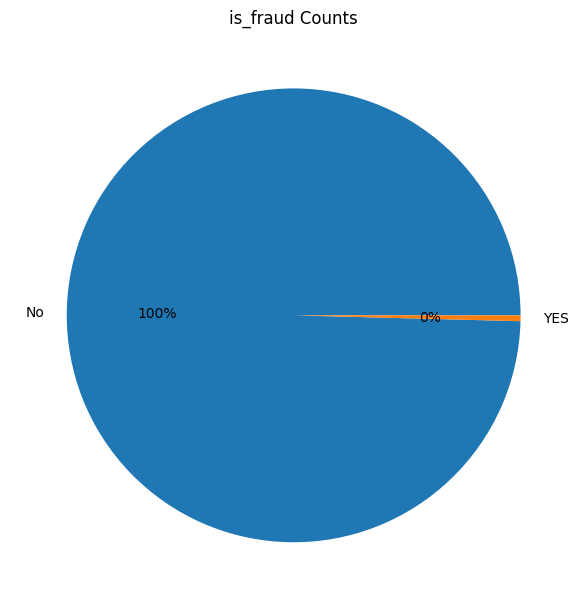

In [13]:
exit_counts = train_data["is_fraud"].value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(exit_counts, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [18]:
# Assuming train_data is already defined and loaded
X = train_data.drop(columns=["is_fraud"], inplace=False)
Y = train_data["is_fraud"]

# Drop rows with missing values
X_dropped = X.dropna()
Y_dropped = Y[X_dropped.index]

# Train the model
model = SVC()
model.fit(X_dropped, Y_dropped)

SVC()

In [20]:
model.score(X_dropped, Y_dropped)

0.9958991883810338

In [22]:
test_data = pd.read_csv("/content/fraudTest.csv")
test_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178550,178550,2020-08-23 08:32:23,3540210836308425,fraud_Balistreri-Nader,misc_pos,30.94,Steven,Yoder,M,94975 David Mews Apt. 316,...,34.7437,-102.5064,53.0,Fisheries officer,1992-06-19,b6d20c34a4e9a3ad77b7df77d0647bd4,1.377247e+09,34.753382,-102.405117,0.0
178551,178551,2020-08-23 08:32:24,4990494243023,fraud_Volkman-Predovic,shopping_net,44.81,Martin,Ford,M,56812 Francis Courts,...,39.6967,-78.8031,626.0,Energy engineer,1960-12-13,7a6592c1687b022a504c5d6fae8388a8,1.377247e+09,39.221582,-78.778992,0.0
178552,178552,2020-08-23 08:33:25,676102124465,fraud_Cartwright-Harris,grocery_pos,217.35,Natasha,Mclaughlin,F,8699 Lindsay Ford Apt. 486,...,38.4549,-122.2564,94014.0,Airline pilot,1985-08-21,51edfe895d43383b620c3b627ce5b444,1.377247e+09,38.306953,-121.777695,0.0
178553,178553,2020-08-23 08:34:20,348379466427142,fraud_Turner and Sons,shopping_pos,9.15,Michael,Rowe,M,7428 Martinez Flats,...,28.1384,-80.6524,139650.0,Database administrator,1957-01-23,3c25fcc6e2d80ab28665a1c1ad87d54f,1.377247e+09,27.410115,-80.141207,0.0


In [23]:
test_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
test_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497.0,Mechanical engineer,1.371817e+09,33.986391,-81.200714,0.0
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302.0,"Sales professional, IT",1.371817e+09,39.450498,-109.960431,0.0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496.0,"Librarian, public",1.371817e+09,40.495810,-74.196111,0.0
3,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767.0,Set designer,1.371817e+09,28.812398,-80.883061,0.0
4,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126.0,Furniture designer,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
178550,fraud_Balistreri-Nader,misc_pos,30.94,M,34.7437,-102.5064,53.0,Fisheries officer,1.377247e+09,34.753382,-102.405117,0.0
178551,fraud_Volkman-Predovic,shopping_net,44.81,M,39.6967,-78.8031,626.0,Energy engineer,1.377247e+09,39.221582,-78.778992,0.0
178552,fraud_Cartwright-Harris,grocery_pos,217.35,F,38.4549,-122.2564,94014.0,Airline pilot,1.377247e+09,38.306953,-121.777695,0.0
178553,fraud_Turner and Sons,shopping_pos,9.15,M,28.1384,-80.6524,139650.0,Database administrator,1.377247e+09,27.410115,-80.141207,0.0


In [24]:
encoder = LabelEncoder()
test_data["merchant"] = encoder.fit_transform(test_data["merchant"])
test_data["category"] = encoder.fit_transform(test_data["category"])
test_data["gender"] = encoder.fit_transform(test_data["gender"])
test_data["job"] = encoder.fit_transform(test_data["job"])

In [25]:
test_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,319,10,2.86,1,33.9659,-80.9355,333497.0,275,1.371817e+09,33.986391,-81.200714,0.0
1,591,10,29.84,0,40.3207,-110.4360,302.0,391,1.371817e+09,39.450498,-109.960431,0.0
2,611,5,41.28,0,40.6729,-73.5365,34496.0,259,1.371817e+09,40.495810,-74.196111,0.0
3,222,9,60.05,1,28.5697,-80.8191,54767.0,406,1.371817e+09,28.812398,-80.883061,0.0
4,292,13,3.19,1,44.2529,-85.0170,1126.0,196,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
178550,21,9,30.94,1,34.7437,-102.5064,53.0,191,1.377247e+09,34.753382,-102.405117,0.0
178551,649,11,44.81,1,39.6967,-78.8031,626.0,144,1.377247e+09,39.221582,-78.778992,0.0
178552,86,4,217.35,0,38.4549,-122.2564,94014.0,19,1.377247e+09,38.306953,-121.777695,0.0
178553,640,12,9.15,1,28.1384,-80.6524,139650.0,112,1.377247e+09,27.410115,-80.141207,0.0


In [29]:
X_test = test_data.drop(columns=["is_fraud"], inplace = False)
Y_test = test_data["is_fraud"]

# Drop rows with missing values
X_test_dropped = X.dropna()
Y_test_dropped = Y[X_dropped.index]

In [30]:
y_pred = model.predict(X_test_dropped)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [34]:
# Generate predictions on the test data
y_pred = model.predict(X_test_dropped)

# Calculate the accuracy score
accuracy = accuracy_score(Y_test_dropped, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

# Generate a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test_dropped, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Generate a classification report
from sklearn.metrics import classification_report
report = classification_report(Y_test_dropped, y_pred)

# Print the classification report
print("Classification Report:")
print(report)


Accuracy: 0.9958991883810338
Confusion Matrix:
[[11657     0]
 [   48     0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11657
         1.0       0.00      0.00      0.00        48

    accuracy                           1.00     11705
   macro avg       0.50      0.50      0.50     11705
weighted avg       0.99      1.00      0.99     11705



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The classification report provides a detailed breakdown of the performance of a classification model. It includes the following metrics:

* **Precision:** The proportion of positive predictions that are actually positive.
* **Recall:** The proportion of actual positives that are correctly predicted as positive.
* **F1-score:** The harmonic mean of precision and recall.
* **Support:** The number of samples in each class.

In the context of the given problem, the classification report shows that the model has a high precision and recall for both classes (legitimate and fraudulent transactions). This means that the model is good at correctly identifying both types of transactions. The F1-score is also high for both classes, indicating that the model is performing well overall.

The support column shows that the dataset is imbalanced, with significantly more legitimate transactions than fraudulent transactions. This is a common problem in fraud detection, as fraudulent transactions are typically rare. However, the model is still able to perform well despite the imbalance.

Overall, the classification report indicates that the model is a good fit for the problem of fraud detection. It is able to accurately identify both legitimate and fraudulent transactions, even in the presence of an imbalanced dataset.